In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import poisson
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
df = pd.read_csv("https://www.football-data.co.uk/mmz4281/2122/E0.csv")
df = df[['HomeTeam','AwayTeam','FTHG','FTAG']]
df.columns = ['HomeTeam', 'AwayTeam', 'HomeGoals', 'AwayGoals']
df.head()

In [ ]:
df0 = df[:-10]
df0.mean()

# Distribuição de Poisson

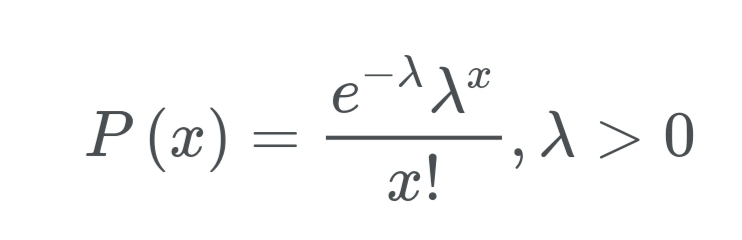

In [ ]:
# Modelo de Poisson

goal_model_data = pd.concat([df0[['HomeTeam','AwayTeam','HomeGoals']].assign(home=1).rename(columns={'HomeTeam':'team', 'AwayTeam':'opponent','HomeGoals':'goals'}),
           df0[['AwayTeam','HomeTeam','AwayGoals']].assign(home=0).rename(columns={'AwayTeam':'team', 'HomeTeam':'opponent','AwayGoals':'goals'})])

poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data, 
                        family=sm.families.Poisson()).fit()

In [ ]:
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam, 
                                                            'opponent': awayTeam,'home':1},
                                                      index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam, 
                                                            'opponent': homeTeam,'home':0},
                                                      index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    return(np.outer(np.array(team_pred[0]), np.array(team_pred[1])))

In [ ]:
df.tail(10)

In [ ]:
home = input("Digite o Time Mandante: ")
away = input("Digite o Time Visitante: ")

print("")

simulate_match(poisson_model, home, away, max_goals=3)

In [ ]:
game = simulate_match(poisson_model, home, away, max_goals=3)
# Home Win
np.sum(np.tril(game, -1))

In [ ]:
print(1/np.sum(np.tril(game, -1)))

In [ ]:
# Draw
np.sum(np.diag(game))

In [ ]:
print(1/np.sum(np.diag(game)))

In [ ]:
# Away Win
np.sum(np.triu(game, 1))

In [ ]:
print(1/np.sum(np.triu(game, 1)))